In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
df = pd.read_csv('../data/retail_sales.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


c:\Users\myche\Anaconda_updated\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\myche\Anaconda_updated\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\myche\Anaconda_updated\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\myche\Anaconda_updated\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY form

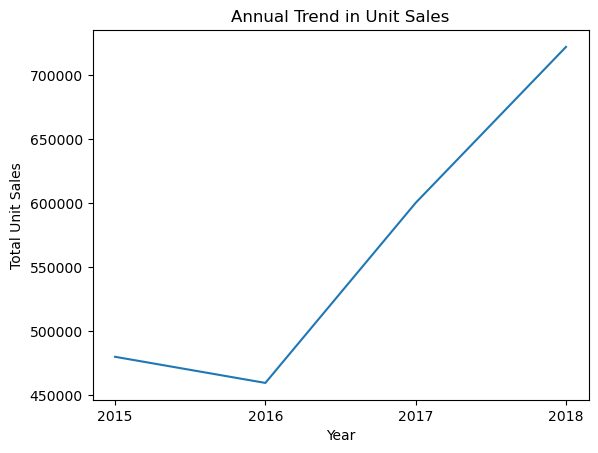

In [4]:
# Create variable for xticks
years = [2015, 2016, 2017, 2018]

df['Order Date'] = pd.to_datetime(df['Order Date'])

annual_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

annual_sales.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Total Unit Sales')
plt.title('Annual Trend in Unit Sales')
plt.xticks(years)
plt.show()

In [5]:
category_sales = df.groupby('Sub-Category')['Sales'].sum()
print(category_sales)

Sub-Category
Accessories    164186.7000
Appliances     104618.4030
Art             26705.4100
Binders        200028.7850
Bookcases      113813.1987
Chairs         322822.7310
Copiers        146248.0940
Envelopes       16128.0460
Fasteners        3001.9600
Furnishings     89212.0180
Labels          12347.7260
Machines       189238.6310
Paper           76828.3040
Phones         327782.4480
Storage        219343.3920
Supplies        46420.3080
Tables         202810.6280
Name: Sales, dtype: float64


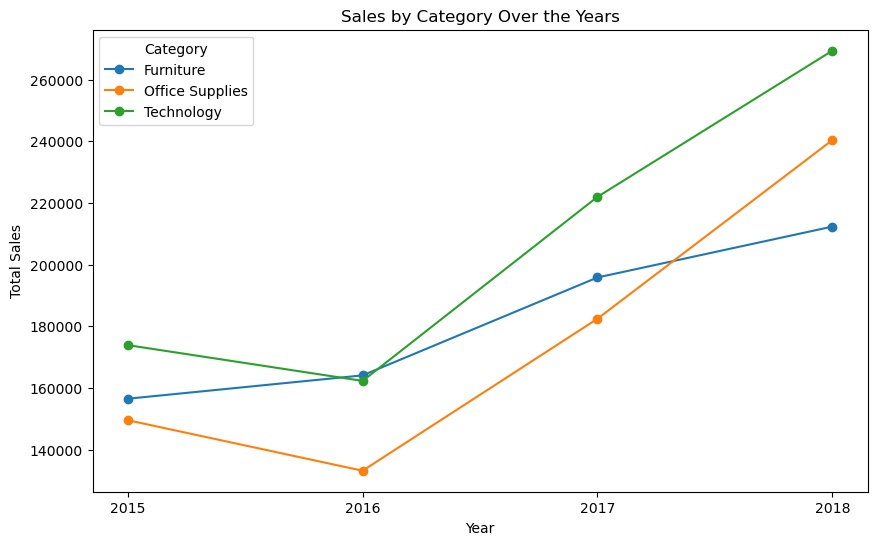

In [7]:
# Create variable for xticks
years = [2015, 2016, 2017, 2018]

# Group the data by year and sub-category and calculate the total sales
cat_sales = df.groupby([df['Order Date'].dt.year, 'Category'])['Sales'].sum()

# Convert the multi-level index to a pivot table
cat_sales = cat_sales.unstack()

# Plot each sub-category as a separate line
cat_sales.plot(kind='line', figsize=(10,6), marker='o')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales by Category Over the Years')
plt.xticks(years)

# Display the plot
plt.show()

In [8]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum()
print(sub_category_sales)

Sub-Category
Accessories    164186.7000
Appliances     104618.4030
Art             26705.4100
Binders        200028.7850
Bookcases      113813.1987
Chairs         322822.7310
Copiers        146248.0940
Envelopes       16128.0460
Fasteners        3001.9600
Furnishings     89212.0180
Labels          12347.7260
Machines       189238.6310
Paper           76828.3040
Phones         327782.4480
Storage        219343.3920
Supplies        46420.3080
Tables         202810.6280
Name: Sales, dtype: float64


In [9]:
# Set the colors for each category using the tab20 colormap
colors = plt.cm.tab20(np.linspace(0, 1, len(subcat_sales_unstacked.columns)))

# Group the data by year and sub-category and calculate the total sales
subcat_sales = df.groupby([df['Order Date'].dt.year, 'Sub-Category'])['Sales'].sum()

# Convert the multi-level index to a pivot table
subcat_sales = subcat_sales.unstack()

# Plot each sub-category as a separate line
subcat_sales.plot(kind='line', figsize=(10,6), marker='o', color=colors)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales by Sub-Category Over the Years')
plt.xticks(years)
plt.legend(bbox_to_anchor=(1.05, 1))
# Display the plot
plt.show()

NameError: name 'subcat_sales_unstacked' is not defined

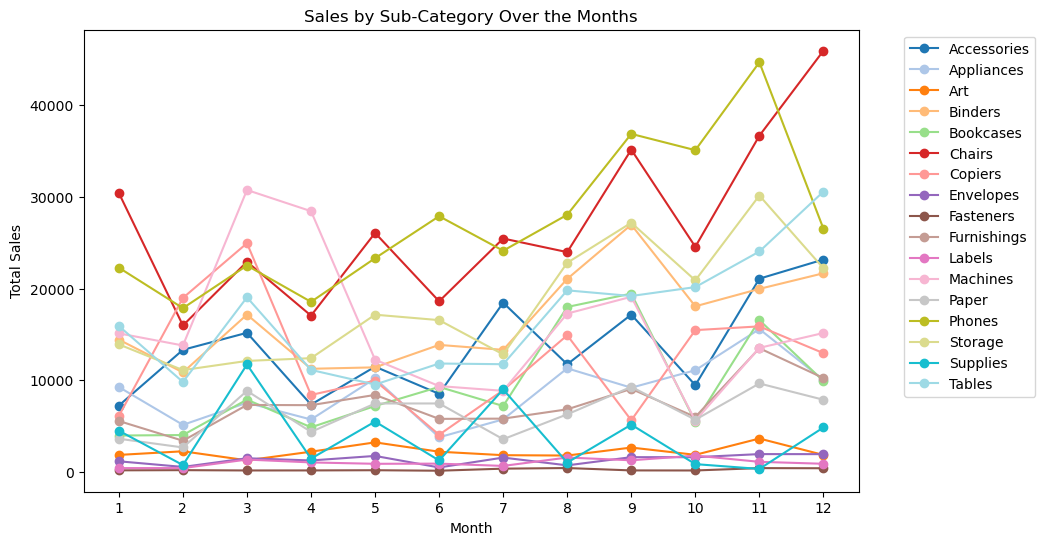

In [69]:
# Set the colors for each category using the tab20 colormap
colors = plt.cm.tab20(np.linspace(0, 1, len(subcat_sales_unstacked.columns)))

# Group the data by month and sub-category and calculate the total sales
subcat_sales = df.groupby([df['Order Date'].dt.month, 'Sub-Category'])['Sales'].sum()

# Convert the multi-level index to a pivot table
subcat_sales = subcat_sales.unstack()

# Plot each sub-category as a separate line
subcat_sales.plot(kind='line', figsize=(10,6), marker='o', color=colors)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Sub-Category Over the Months')
plt.xticks(range(1, 13))
plt.legend(bbox_to_anchor=(1.05, 1))
# Display the plot
plt.show()


In [54]:
top_products = df.groupby(['Category', 'Sub-Category', 'Product Name'])['Sales'].sum().reset_index()
top_products = top_products.sort_values(by='Sales', ascending=False)
top_products.head(20)

,Category,Sub-Category,Product Name,Sales
1591,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,61599.8240
716,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.3840
1611,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.4800
90,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,21870.5760
728,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,19823.4790
730,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,19024.5000
1594,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,18839.6860
1619,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,18374.8950
725,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,17965.0680
1427,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,17030.3120


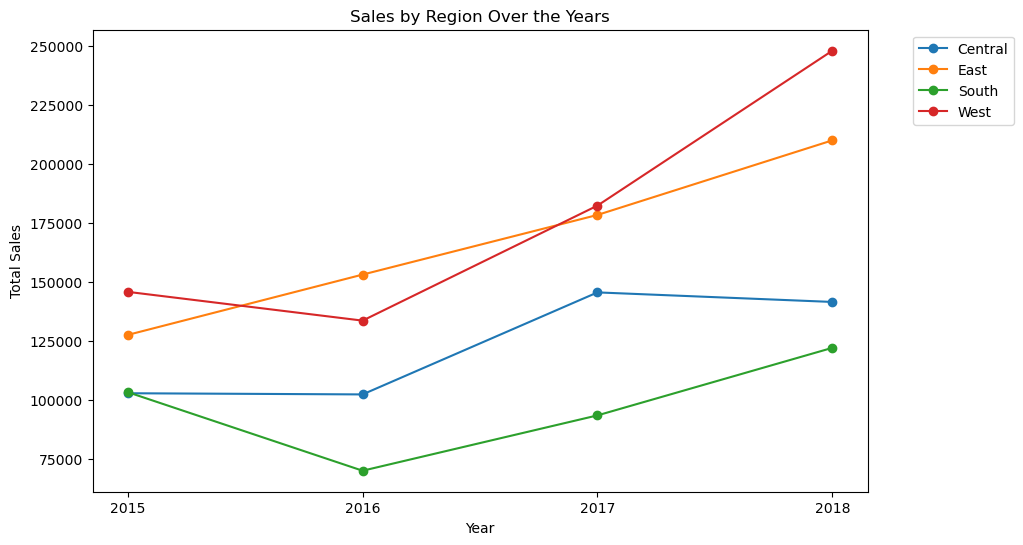

In [63]:
# Group the data by region and year and calculate the total sales
region_sales = df.groupby([df['Order Date'].dt.year, 'Region'])['Sales'].sum()

# Convert the multi-level index to a pivot table
region_sales = region_sales.unstack()

# Plot each region as a separate line
region_sales.plot(kind='line', figsize=(10,6), marker='o')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales by Region Over the Years')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(years)
# Display the plot
plt.show()
